In [1]:
import skimage.io as io
import scipy.fft as fft
import cv2

In [2]:
img_rgb = io.imread('eyetest.jpg')
img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [3]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

faces = face_cascade.detectMultiScale(img_grey, 1.3, 5)

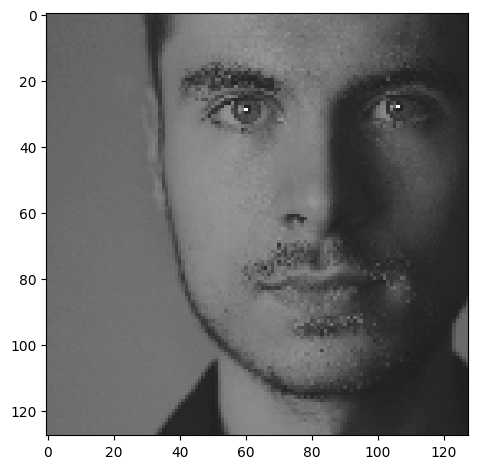

In [4]:
import numpy as np


(x, y, w, h) = faces[0]

resize = cv2.resize(img_grey[x:x+w, y:y+h], (128, 128))
resize = resize / 255
resize = np.log(resize + 1)
eyeloc = np.copy(resize)
eyeloc[29,60] = 1
eyeloc[28,106] = 1
io.imshow(eyeloc)

In [5]:
# find guassian of left eye
xvals = np.arange(0,128) - 29
yvals = np.arange(0,128) - 60
sigma = 1.0
gauss = np.zeros([128,128])
for i in range(127):
    for j in range(127):
        gauss[i, j] = np.exp(-1.0 * (np.square(i - 29) + np.square(j - 60)) / np.square(sigma))


In [6]:
imgf = fft.fft2(resize)
gaussf = fft.fft2(gauss)
asef = gaussf/imgf

1.0 0.2
(128, 128) (128, 128)


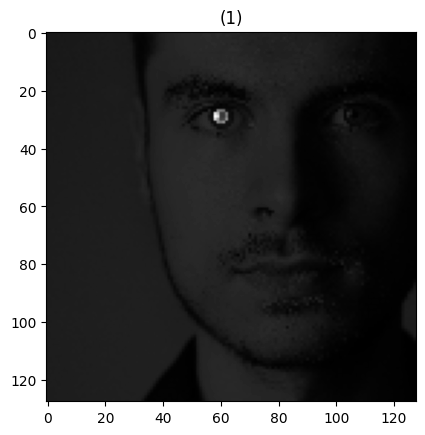

In [7]:
thresh = np.abs(fft.ifft2(asef * imgf))
thresh[thresh > 0.005] = 1
thresh[thresh <= 0.005] = 0.2
print(thresh.max(), thresh.min())
print(thresh.shape, resize.shape)
import commonfunctions as cf
cf.show_images([resize * thresh])


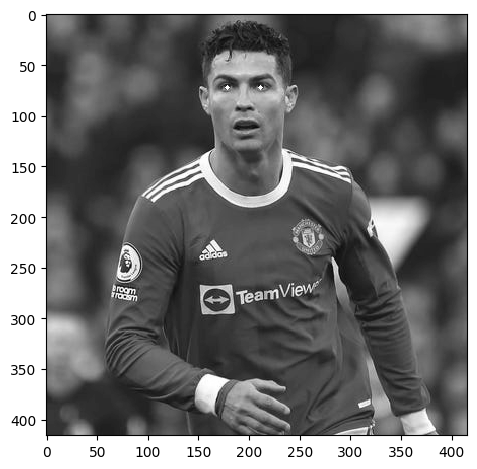

In [8]:
import dlib
import cv2
detector = dlib.get_frontal_face_detector() 
predictor=dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")
img = cv2.imread('./r.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
detect=detector(gray,1)
shape=predictor(gray,detect[0])
x1, y1 =(shape.part(37).x + shape.part(40).x)//2, (shape.part(37).y + shape.part(40).y)//2
x2, y2 =(shape.part(43).x + shape.part(46).x)//2, (shape.part(43).y + shape.part(46).y)//2
cv2.circle(gray, (x1,y1), 2, 255, -1)
cv2.circle(gray, (x2,y2), 2, 255, -1)
io.imshow(gray)

In [9]:
from eyeloc import eyelocator

In [43]:
locator = eyelocator()
img = cv2.imread('./r.jpg')
img2 = cv2.imread('./rock.jpg')
img3 = cv2.imread('./background.jpg')
img4 = cv2.imread('./cr7.jpg')
img5 = cv2.imread('./cr8.jpg')
img6 = cv2.imread('./cr9.png')




locator.train([img, img2, img3, img4, img6])

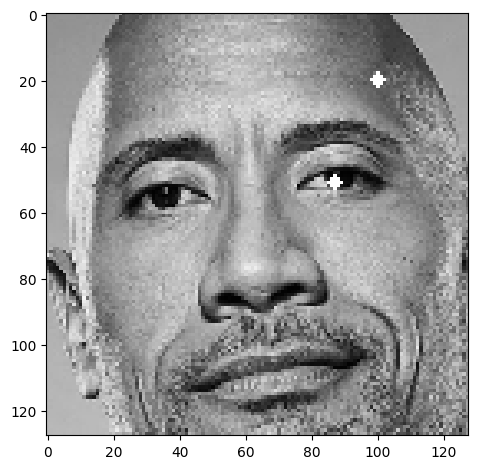

In [47]:
img = cv2.imread('./rock.jpg')
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(
            cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
        )
faces = face_cascade.detectMultiScale(img_grey, 1.3, 5)
(y, x, h, w) = faces[0]
face = img_grey[x : x + w, y : y + h]

io.imshow(locator.findeye(face))